In [14]:
import pandas as pd

# Load Excel file
df = pd.read_excel('/kaggle/input/retail-sales-dataset-sample-transactions/Online Retail Data Set.xlsx')

# Display the first few rows
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [15]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values (or you can use df.fillna() to fill missing data)
df.dropna(inplace=True)

# Check the column names
print(df.columns)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [16]:
# Basic statistics
print(df.describe())

# Check the column names
print(df.columns)


            Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mean       12.061303  2011-07-10 16:30:57.879207424       3.460471   
min    -80995.000000            2010-12-01 08:26:00       0.000000   
25%         2.000000            2011-04-06 15:02:00       1.250000   
50%         5.000000            2011-07-31 11:48:00       1.950000   
75%        12.000000            2011-10-20 13:06:00       3.750000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       248.693370                            NaN      69.315162   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  
Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [17]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


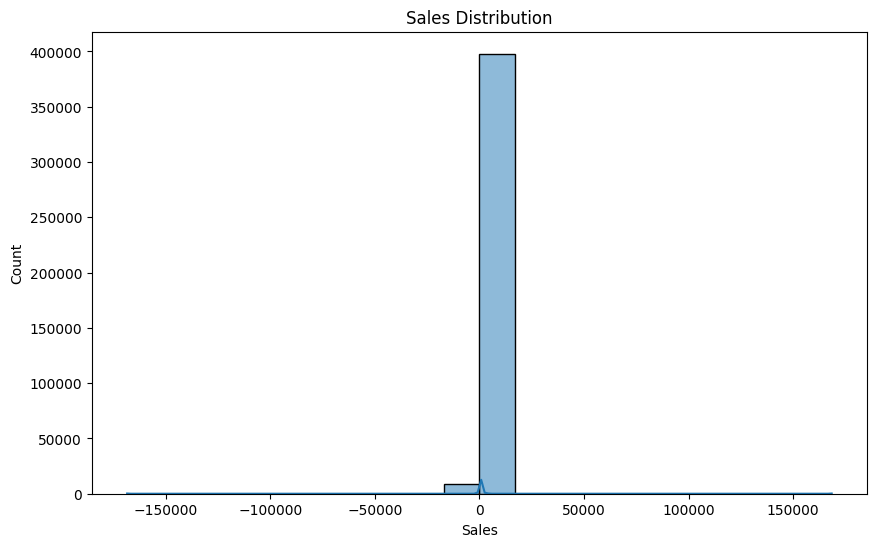

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sales'], bins=20, kde=True)
plt.title('Sales Distribution')
plt.show()

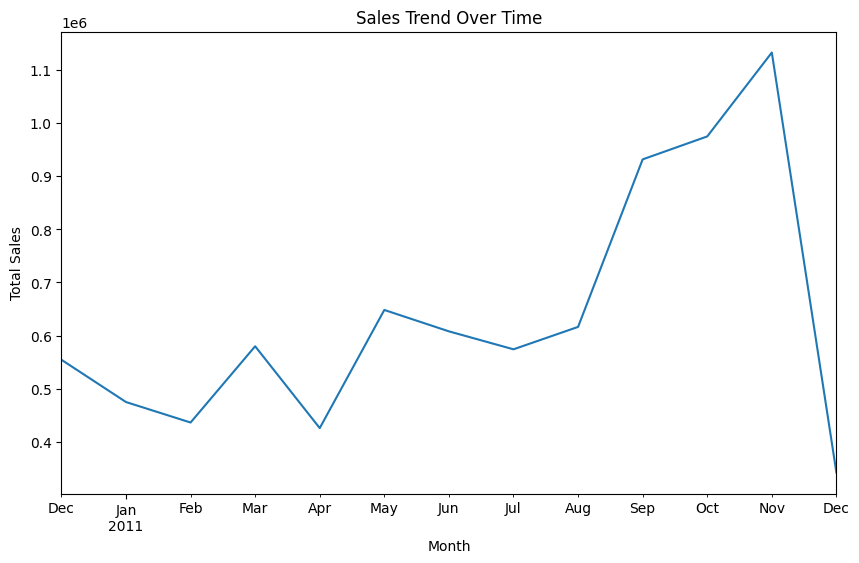

In [19]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group data by month and calculate total sales
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Sales'].sum()

# Plot sales trend over time
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [20]:
# Top-selling products based on quantity
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print(top_products)

# Top-selling countries based on total sales
top_countries = df.groupby('Country')['Sales'].sum().sort_values(ascending=False).head(10)
print(top_countries)

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64
Country
United Kingdom    6767873.394
Netherlands        284661.540
EIRE               250285.220
Germany            221698.210
France             196712.840
Australia          137077.270
Switzerland         55739.400
Spain               54774.580
Belgium             40910.960
Sweden              36595.910
Name: Sales, dtype: float64


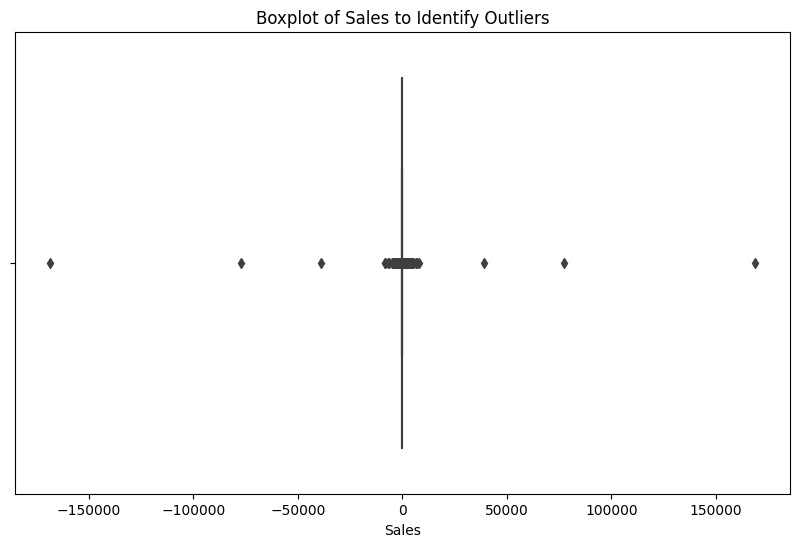

In [21]:
# Boxplot to visualize outliers in sales
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sales'])
plt.title('Boxplot of Sales to Identify Outliers')
plt.show()